# A hands-on introduction to Natural Language Processing in Python


## Pre-requisites
### Installing Jupyter

- If you already have Anaconda, you should have Jupyter installed as well. ```jupyter notebook``` opens up a Jupyter notebook in your browser at default port 8888. 

- Use pip install. ```python3 -m pip install jupyter``` for Python 3 install, ```python -m pip install jupyter``` for Python 2 install. 

- To access Jupyter online, go to 

For more details, refer to https://jupyter.org/install

### Import packages
Import the following packages
- nltk
- gensim
- requests
- lxml
- wikipedia
- 

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## NLTK
Natural Language Toolkit is the most popular collection of libraries and programs to do NLP. You can find more about it here: http://www.nltk.org/book/ch00.html. NLTK also comes pre-loaded with texts from the Project Gutenberg archive that you can use. We will mainly be using NLP to perform different tasks, along with a few other packages like SpaCy, Gensim, etc.

## Getting the data
Data can come from a variety of sources in different formats. Natural language can be in the form of text or speech. For the purpose of this tutorial, we will be focusing on text-based processing as opposed to speech recognition and synthesis. <br>

Textual data can be stored in databases, dataframes, text files, webpages, etc.

In [0]:
sample_data = ["Today is a cold Sunday morning. I am at the Nashville School of Law. \
               I am here for PyTennessee where I can learn more about Python."]

You can also scrape a webpage using the requests and lxml libraries. Let's trying scraping the landing page for PyTennessee.

In [0]:
from lxml import html
import requests

page = requests.get('https://www.pytennessee.org/')
tree = html.fromstring(page.content)
conference_data = tree.xpath('/html/body/div[4]/div/div/div[2]/p[string(.)]/text()')
print(conference_data)

["PyTennessee is a yearly regional Python conference held every February in Nashville, TN. PyTennessee 2019 will be our 6th year, and like every year before it, promises to be our best yet! There's a bit of something for everyone at PyTennessee 2019, and if you'd like to know more about it, please visit our ", '.', 'PyTennessee is a nonprofit event facilitated by TechFed Nashville, a Tennessee nonprofit organization whose mission is to support and grow the grassroots tech talent in Middle Tennessee through educational events and groups. TechFed provides financial stewardship, risk management and volunteer leadership development for Nashville-area technology events.', 'PyTennessee is dedicated to a harassment-free conference experience for everyone. Our anti-harassment policy can be found at: ']


## Sentence segmentation
Also called sentence tokenization or sentence boundary disambiguation, breaks up sentences by deciding where a sentence starts and ends. Challenges include recognizing ambiguous puncutation marks. Use ```sent_tokenize``` from ```nltk.tokenize```.

In [0]:
from nltk.tokenize import sent_tokenize

def get_sent_tokens(data):
    """Sentence tokenization"""
    sentences = []
    for sent in data:
        sentences.extend(sent_tokenize(sent))
    print(sentences)
    return sentences


In [0]:
sample_sentences = get_sent_tokens(sample_data)
conference_sentences = get_sent_tokens(conference_data)

['Today is a cold Sunday morning.', 'I am at the Nashville School of Law.', 'I am here for PyTennessee where I can learn more about Python.']
['PyTennessee is a yearly regional Python conference held every February in Nashville, TN.', 'PyTennessee 2019 will be our 6th year, and like every year before it, promises to be our best yet!', "There's a bit of something for everyone at PyTennessee 2019, and if you'd like to know more about it, please visit our", '.', 'PyTennessee is a nonprofit event facilitated by TechFed Nashville, a Tennessee nonprofit organization whose mission is to support and grow the grassroots tech talent in Middle Tennessee through educational events and groups.', 'TechFed provides financial stewardship, risk management and volunteer leadership development for Nashville-area technology events.', 'PyTennessee is dedicated to a harassment-free conference experience for everyone.', 'Our anti-harassment policy can be found at:']


## Word tokenization
Similar to sentence tokenization, but works on words. Use ```word_tokenize``` from ```nltk.tokenize```. 

In [0]:
from nltk.tokenize import word_tokenize

def get_word_tokens(sentences):
    '''Word tokenization'''
    words = []
    for sent in sentences:
        words.extend(word_tokenize(sent))
    print(words)
    return(words)


In [0]:
# sample_words = get_word_tokens(sample_sentences)
# conference_words = get_word_tokens(conference_sentences)

## Frequency distribution
Calculates the frequency distribution for each word in the data. Use ```nltk.probability``` from ```FreqDist``` and ```matplotlib```.

In [0]:
import matplotlib
from nltk.probability import FreqDist
matplotlib.use('TkAgg') 

def plot_freq_dist(words, num_words = 20):
    fdist = FreqDist(words)
    fdist.plot(num_words,cumulative=False)
    

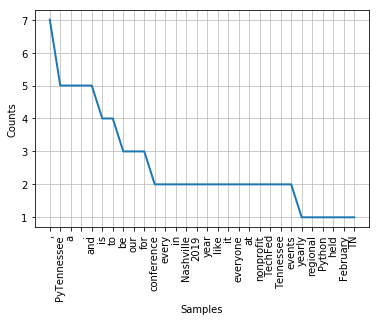

In [0]:
# plot_freq_dist(sample_words, num_words=10)
plot_freq_dist(conference_words, num_words=30)

## Cleaning the data
Real world data is often messy. You can do a bunch of preprocessing to ensure the data is clean, like:
- Removing special characters
- Removing stopwords


In [0]:
import re
def remove_special_characters(sentences, remove_digits=False):
    clean_sentences = []
    for sent in sentences:
        pattern = r'/[^\w-]|_/' if not remove_digits else r'[^a-zA-Z\s]'  # Regex needs correction
        clean_text = re.sub(pattern, '', sent)
        clean_sentences.append(clean_text)
    print(clean_sentences)
    return clean_sentences

In [0]:
remove_special_characters(sample_sentences)
conference_sentences = remove_special_characters(conference_sentences)

['Today is a cold Sunday morning.', 'I am at the Nashville School of Law.', 'I am here for PyTennessee where I can learn more about Python.']
['PyTennessee is a yearly regional Python conference held every February in Nashville, TN.', 'PyTennessee 2019 will be our 6th year, and like every year before it, promises to be our best yet!', "There's a bit of something for everyone at PyTennessee 2019, and if you'd like to know more about it, please visit our", '.', 'PyTennessee is a nonprofit event facilitated by TechFed Nashville, a Tennessee nonprofit organization whose mission is to support and grow the grassroots tech talent in Middle Tennessee through educational events and groups.', 'TechFed provides financial stewardship, risk management and volunteer leadership development for Nashville-area technology events.', 'PyTennessee is dedicated to a harassment-free conference experience for everyone.', 'Our anti-harassment policy can be found at:']


## Text processing
Text processing approaches like stemming and lemmatization help in reducing inflectional forms of words. 
### Stemming
Stemming tries to cut off at the ends of the words in the hope of deriving the base form. Use ```PorterStemmer``` from ```ntlk.stem```.

In [0]:
# Stemming and lemmatization
from nltk.stem import PorterStemmer

def get_stems(words):
    ps = PorterStemmer()
    stems = []
    for word in words:
        stems.append(ps.stem(word))
    print(stems)
    return stems

In [0]:
sample_stems = get_stems(sample_words)
# conference_stems = get_stems(conference_words)

['today', 'is', 'a', 'cold', 'sunday', 'morn', '.', 'I', 'am', 'at', 'the', 'nashvil', 'school', 'of', 'law', '.', 'I', 'am', 'here', 'for', 'pytennesse', 'where', 'I', 'can', 'learn', 'more', 'about', 'python', '.']


### Lemmatization
Lemmatization groups different inflected forms of a words so they can be mapped to the same base. 
More complex than stemming, context of words is also analyzed. Uses WordNet which is a lexical English database. 
Use ```WordNetLemmatizer``` from ```nltk.stem```.


In [0]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def get_lemma(words):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma = []
    for word in words:
        lemma.append(wordnet_lemmatizer.lemmatize("becoming")) # Warning: Lemmatizer needs a POS tag or else it treats it as a noun and doesn't change it
#     print(lemma)
#     return(lemma)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
# sample_lemma = get_lemma(sample_words)
# conference_lemma = get_lemma(conference_words)

## POS tagging
The English language is formed of different parts of speech (POS) like nouns, verbs, pronouns, adjectives, etc. POS tagging analyzes the words in a sentences and associates it with a POS tag depending on the way it is used. Also called grammatical tagging or word-category disambiguation. Use ```nltk.pos_tag```. There are different types of tagsets used with the most common being the Penn Treebank tagset and the Universal tagset. 

In [0]:
nltk.download('averaged_perceptron_tagger')

def get_pos_tags(words):
    tags=[]
    for word in words:
        tags.append(nltk.pos_tag([word]))
    print(tags)
    return tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gjena/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
sample_tags = get_pos_tags(sample_words)
# conference_tags = get_pos_tags(conference_words)

[[('Today', 'NN')], [('is', 'VBZ')], [('a', 'DT')], [('cold', 'NN')], [('Sunday', 'NNP')], [('morning', 'NN')], [('.', '.')], [('I', 'PRP')], [('am', 'VBP')], [('at', 'IN')], [('the', 'DT')], [('Nashville', 'NNP')], [('School', 'NN')], [('of', 'IN')], [('Law', 'NN')], [('.', '.')], [('I', 'PRP')], [('am', 'VBP')], [('here', 'RB')], [('for', 'IN')], [('PyTennessee', 'NN')], [('where', 'WRB')], [('I', 'PRP')], [('can', 'MD')], [('learn', 'NN')], [('more', 'RBR')], [('about', 'IN')], [('Python', 'NN')], [('.', '.')]]


![Image of Yaktocat](https://i.stack.imgur.com/FhcKV.png)

## Named entity recognition
Use NER to identify entities like person, organization, city, etc. Helpful in redacting PII. More details here: https://www.nltk.org/book/ch07.html


## Bag of words
Bag of words is an approach for text feature extraction. Just imagine a bag of popcorn, 
and each popcorn kernel represents a word that is present in the text. Each sentence can be represented as a vector
of all the words present in a vocabulary. If a word is present in the sentence, it is 1, otherwise 0.

![Image of Yaktocat](https://cdn-images-1.medium.com/max/1600/1*zMdHVQQ7HYv_mMZ5Ne-2yQ.png)

## TF-IDF
Term-frequency inverse document frequency assigns scores to words inside a document. Commonly occuring words in all documents would have less weightage.
![Image of Yaktocat](http://www.bloter.net/wp-content/uploads/2016/09/td-idf-graphic.png)

In [0]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

def get_bag_of_words(sentences):
    vectorizer = CountVectorizer()
    print(vectorizer.fit_transform(sentences).todense())
    print(vectorizer.vocabulary_) 

In [0]:
get_bag_of_words(sample_data)
get_bag_of_words(conference_data)

[[1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
{'today': 19, 'is': 7, 'cold': 4, 'sunday': 17, 'morning': 11, 'am': 1, 'at': 2, 'the': 18, 'nashville': 12, 'school': 16, 'of': 13, 'law': 8, 'here': 6, 'for': 5, 'pytennessee': 14, 'where': 20, 'can': 3, 'learn': 9, 'more': 10, 'about': 0, 'python': 15}
[[2 1 1 2 0 0 1 2 1 1 1 0 0 1 0 0 0 0 0 2 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1
  2 1 0 2 0 0 0 1 1 0 1 0 3 1 0 1 0 3 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 2 1 0
  0 1 2 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]
 [0 0 0 3 0 1 0 0 0 0 0 1 0 0 0 1 1 1 2 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 2
  0 0 1 0 1 1 1 0 2 2 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 2 1 2 1 0 1 0 1 0 1
  1 0 0 0 0 0]
 [0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 2 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0]]
{'pytennessee': 53, 'is': 35, 'yearly': 75, '

## Topic modeling
Topic modeling is an unsupervised ML method. Used to find inherent structure in documents. Use it to learn
representations of topics in different documents. Can also be used to group different documents together. We will
use ```Gensim``` library and Latent Dirichlet Allocation for this.

LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.

![Image of Yaktocat](https://i.stack.imgur.com/vI8Lc.png)

Code from: https://kleiber.me/blog/2017/07/22/tutorial-lda-wikipedia/


In [0]:
import wikipedia, random

def fetch_data():
    wikipedia_random_articles = wikipedia.random(2)
    wikipedia_random_articles.append('Music')
    wikipedia_random_articles.append('Gardening')
    wikipedia_random_articles.append('Reading')
    wikipedia_random_articles.append('Nashville')
    wikipedia_random_articles.append('Tennessee')
    wikipedia_random_articles
    print(wikipedia_random_articles)
    
    wikipedia_articles = []
    for wikipedia_article in wikipedia_random_articles:
        wikipedia_articles.append([wikipedia_article, 
                                   wikipedia.page(wikipedia_article).content])
    return wikipedia_articles

In [0]:
nltk.download('stopwords')    
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

def clean(article):
    title, document = article
    tokens = RegexpTokenizer(r'\w+').tokenize(document.lower())
    tokens_clean = [token for token in tokens if token not in 
                    stopwords.words('english')]
    tokens_stemmed = [PorterStemmer().stem(token) for token 
                      in tokens_clean]
    return (title, tokens_stemmed)

[nltk_data] Downloading package stopwords to /Users/gjena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from gensim import corpora, models
import gensim

wikipedia_articles = fetch_data()
wikipedia_articles
wikipedia_articles_clean = list(map(clean, wikipedia_articles))
# wikipedia_articles_clean
article_contents = [article[1] for article in wikipedia_articles_clean]
dictionary = corpora.Dictionary(article_contents)
# dictionary
# bag_of_words = [dictionary.doc2bow(article_contents)]

corpus = [dictionary.doc2bow(article) for article in 
          article_contents[:-1]] # All except 'Tennessee'
# corpus
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, 
                                            id2word = dictionary, 
                                            passes=100)

print(lda_model.print_topics(num_topics=7, num_words=5))
# print(list(lda_model[[dictionary.doc2bow(article_contents[-1])]]))

['Henry Beaufoy', 'Tees Maar Khan', 'Music', 'Gardening', 'Reading', 'Nashville', 'Tennessee']
[(0, '0.060*"music" + 0.009*"perform" + 0.007*"song" + 0.007*"form" + 0.007*"instrument"'), (1, '0.054*"garden" + 0.012*"plant" + 0.010*"use" + 0.006*"grow" + 0.005*"also"'), (2, '0.035*"nashvil" + 0.016*"citi" + 0.008*"tennesse" + 0.008*"state" + 0.006*"music"'), (3, '0.049*"read" + 0.012*"word" + 0.010*"text" + 0.007*"reader" + 0.006*"use"'), (4, '0.000*"test" + 0.000*"london" + 0.000*"son" + 0.000*"british" + 0.000*"advoc"')]


In [0]:
print(list(lda_model[[dictionary.doc2bow(article_contents[-1])]]))

[[(0, 0.10346588), (1, 0.044794824), (2, 0.7615434), (3, 0.038285792), (4, 0.051910114)]]


## Word embeddings - Word2Vec
Vector space model - represent words and sentences as vectors to get semantic relationships. A really good tutorial for Word2Vec is here: https://www.kaggle.com/alvations/word2vec-embedding-using-gensim-and-nltk

![Image of Yaktocat](http://www.flyml.net/wp-content/uploads/2016/11/w2v-3-samples.png)

## Sentiment analysis



In [0]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
  
restaurant_reviews = ["Great place to visit in Nashville.",
"The food took too long to come, the service was slow.",
"Everything was amazing.",
"Place closed down a month ago.",
"Had to wait in line for an hour, but the food was worth the wait.",
]
  
sentiment_analyzer = SentimentIntensityAnalyzer()
for sentence in restaurant_reviews:
     print(sentence)
     sentiment_score = sentiment_analyzer.polarity_scores(sentence)
     for score in sentiment_score:
         print('{0}: {1},' .format(score, sentiment_score[score]), end='')
     print()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Great place to visit in Nashville.
neg: 0.0,neu: 0.549,pos: 0.451,compound: 0.6249,
The food took too long to come, the service was slow.
neg: 0.0,neu: 1.0,pos: 0.0,compound: 0.0,
Everything was amazing.
neg: 0.0,neu: 0.345,pos: 0.655,compound: 0.5859,
Place closed down a month ago.
neg: 0.0,neu: 1.0,pos: 0.0,compound: 0.0,
Had to wait in line for an hour, but the food was worth the wait.
neg: 0.0,neu: 0.856,pos: 0.144,compound: 0.3291,


## Additional resources
* https://blog.algorithmia.com/introduction-natural-language-processing-nlp/
* https://www.seas.upenn.edu/~romap/nlp-resources.html
* https://medium.com/@ageitgey/natural-language-processing-is-fun-9a0bff37854e
* http://www.vikparuchuri.com/blog/natural-language-processing-tutorial/
* https://monkeylearn.com/blog/definitive-guide-natural-language-processing/
* https://towardsdatascience.com/text-analytics-topic-modelling-on-music-genres-song-lyrics-deb82c86caa2 



